# <center> Georgia Institute of Technology
# <center> ECE 8803: Hardware-Software Co-Design for Machine Learning Systems (HML)
# <center> Spring 2024
## <center>  Homework Assignment # 0
## <center>  Due: Friday, January 12, 2023 @ 11:59 pm EST




**Please read the following instructions carefully.**
- The entire homework assignment is to be completed on this `ipython` notebook. It is designed to be used with `Google Colab`, but you may use other tools (e.g., Jupyter Lab) as well.
- Make sure that you execute all cells in a way so their output is printed beneath the corresponding cell. Thus, after successfully executing all cells properly, the resulting notebook has all the questions and your answers.  
- <font color='red'> Important task are written in red </font>
- Print a PDF copy of the notebook with all its outputs printed and submit the **PDF** on `Canvas` under Assignments
- Make sure you delete any scratch cells before you export this document as a PDF. Do not change the order of the questions and do not remove any part of the questions. Edit at the indicated places only.
- Rename the PDF according to the format:  ***LastName_FirstName_ECE_8803_HML_sp24_assignment_#.pdf***
- Upon completion of the notebook, an output csv file will be generated. Submit the csv file along with the pdf. `DO NOT MODIFY IT`.
- It is encouraged for you to discuss homework problems amongst each other, but any copying is strictly prohibited and will be subject to Georgia Tech Honor Code.
- Late homework is not accepted unless arranged otherwise and in advance.
- Comment on your codes.

## **Guide for Using Ipython Notebooks:**

For this lab, we will be using Ipython Notebooks.
Google colab is a free to use environment that allows you to write and execute Python in your browser.<br>
Here is a [video](https://www.youtube.com/watch?v=inN8seMm7UI) shows how to use google colab.<br>
Here is a [colab](https://colab.research.google.com/?utm_source=scs-index#scrollTo=GJBs_flRovLc) to learn more about colabs in an interractive manner.<br>

### **Guide for Exporting Ipython Notebook to PDF:**
Here is a [video](https://www.youtube.com/watch?v=yXzw9Dd_Na0) summarizes how to export Ipythin Notebook into PDF.<br>
 - **[Recommended Method: GoFullPage]**<br>
 Install the extension "[GoFullPage](https://chrome.google.com/webstore/detail/gofullpage-full-page-scre/fdpohaocaechififmbbbbbknoalclacl)" for Google Chrome. After you run every cell on Google Collab, use this tool to take a screenshot of all of the questions. Then download the screenshot as a PDF file. Remember that this extension might take a few minutes to create the PDF. To see the procedure, go over the example visuals of the extension "GoFullPage."<br>
 Note: Anyother method of generating the pdf is also welcome. But it would be student's responsibility to ensure figures or texts are readable. Try to tweak the layout by adding empty lines to avoid the code and outputs being splitted into multiple pages.


## Enabling and testing the GPU

For this lab, we will be running all experiments on CPU and GPU.

You'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- Select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with the following code.

In [9]:
import torch
if torch.cuda.is_available():
  print("GPU is enabled")
else:
  print("GPU is not enabled. Please go to Runtime->Change Runtime Type, and select T4 GPU.")


GPU is not enabled. Please go to Runtime->Change Runtime Type, and select T4 GPU.


## Lab Layout
Part 1 - Training AlexNet on Cifar 10 - 30 points <br>
Part 2 - Inference on an Imagenet image - 30 points <br>
Part 3 - LLM text generation using GPT - 30 points <br>
Output CSV generation - 10 points


## Part 1 - Training AlexNet on Cifar10 [30 points]

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time



# Download CIFAR-10 dataset and apply transformations
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406] , [0.229, 0.224, 0.225]),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

100%|██████████| 170498071/170498071 [00:02<00:00, 76866552.01it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


### Exercise 1.A : Complete alexnet class decleration [15 points]

[Alexnet](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) is one of the original convolutional neural network. [Further Reading](https://www.oreilly.com/library/view/tensorflow-for-deep/9781491980446/ch01.html)

 <font color='red'>Fill in the value of number of channels in alexnet.</font>

You can refer the following image to interpret the values of channels.
Currently all the channel values is set to 1.



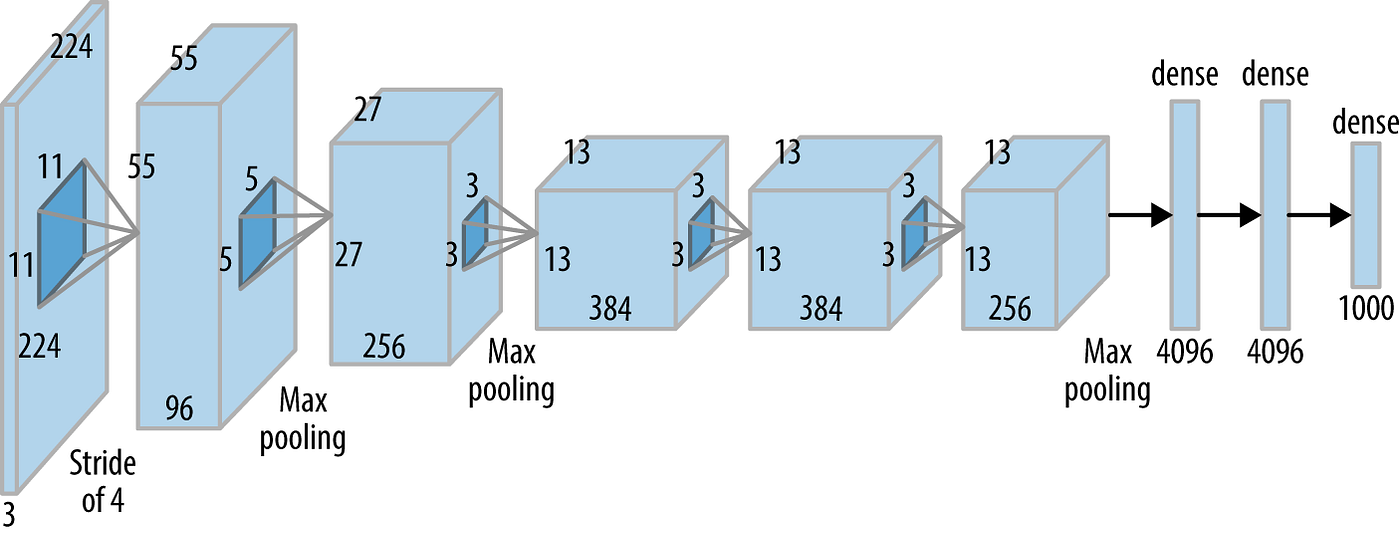
Image source : oreilly.com

In [ ]:
# Define the AlexNet model
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        #########################
        ## Students will write
        #########################
        input_channels = 3
        conv1_channels = 96
        conv2_channels = 256
        conv3_channels = 384
        conv4_channels = 384
        conv5_channels = 256
        #CLASS torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
        ######################
        self.features = nn.Sequential(
            nn.Conv2d(input_channels, conv1_channels, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(conv1_channels, conv2_channels, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(conv2_channels, conv3_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(conv3_channels, conv4_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(conv4_channels, conv5_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

### Exercise 1.B : Run the alexnet training on cifar10 for 1 epochs on CPU. [5 points]

Provided below is a brief example of training a network using backpropogation. [Detailed Blog](https://pyimagesearch.com/2021/07/19/pytorch-training-your-first-convolutional-neural-network-cnn/) for understanding what each step of the function does.


 <font color='red'> Ensure the number of epoches is set correctly to 1.

**Estimated Runtime (~ 2hr) for cpu.**</font> <br>


In [ ]:
def train_model(device='cpu'):
  # Initialize the model, loss function, and optimizer

  net = AlexNet().to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

  # Training loop
  epochs = 1
  for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print('Loss: ', (running_loss / 100))
            running_loss = 0.0
    print(f'Epoch {epoch} Completed')
  print('Finished Training')


In [ ]:
start = time.time()
## Define the device
device = 'cpu'    ## CPU
train_model(device)
end = time.time()
training_time_cpu = end-start
print(f'Training Alexnet on {device} took {training_time_cpu:0.3f} secs')

Loss:  2.30256005525589
Loss:  2.3022244477272036
Loss:  2.301939218044281
Epoch 0 Completed
Finished Training
Training Alexnet on cpu took 3728.297 secs


In [ ]:
# Based on the prints of in training, fill the value of the variable.
final_loss_cpu =  2.301939218044281## Do not change the variable name


### Exercise 1.C : Training using GPU. [5 points]

 <font color='red'> Rerun the alexnet training on GPU. <br> </font>

In [ ]:
## Write code to train_model on GPU and measure the time.
## Correctly initialize the device as gpu
## Call the train_model function, and measure its time.
training_time_gpu = 1 ## Do not change the variable name
start = time.time()
device = 'cuda'
train_model(device)
end = time.time()
training_time_gpu = end-start
print(f'Training Alexnet on {device} took {training_time_gpu:0.3f} secs')

Loss:  2.3026058292388916
Loss:  2.3021065950393678
Loss:  2.301588280200958
Epoch 0 Completed
Finished Training
Training Alexnet on cuda took 155.611 secs


In [ ]:
# Based on the prints of in training, fill the value of the variable.
final_loss_gpu = 2.301588280200958 ## Do not change the variable name


### Exercise 1.D : Fill the table below. [5 points]

 <font color='red'> Double click the table below and fill in the values.<br> </font>

| -  | Runtime (s) | Final Loss |
|----|---------|------------|
|CPU |    3728.297 secs     |  2.301939218044281          |
|GPU |   155.611 secs      |      2.301588280200958      |

## Part 2: Inference on an Imagenet image [30 points]


### Exercise 2.A : Correctly call the inference model. [10 points]

[Vision Transformers](https://arxiv.org/abs/2010.11929) is one of the latest model with highest accuracy on imagenet1k.

We will be using pretrained pytorch model [VIT_base](https://pytorch.org/vision/stable/models/generated/torchvision.models.vit_b_16.html#torchvision.models.vit_b_16) for inference.

<font color='red'> Currently, ResNet50 has been called temporarily, replace it with appropriate function for ViT base. </font>


In [ ]:
## Fill in the correct vit_base model here.
inference_model = torchvision.models.resnet50(weights='IMAGENET1K_V1')
inference_model.eval() ## Preparing the model for inference.

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 148MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Download an example image from the pytorch website
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

# Download list of imagenet classes
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt


--2024-01-14 19:03:05--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2024-01-14 19:03:05 (77.7 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [ ]:
from PIL import Image
def inference(device='cpu'):
  input_image = Image.open(filename) # get the picture of a dog
  preprocess = transforms.Compose([   # transforms the images and ToTensor convert the image to tensor
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])
  input_tensor = preprocess(input_image)  # preprocess the images.
  input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
  # unsqueeze will add one dimension in 0 dim
  input_batch = input_batch.to(device)  # move tensor to gpu
  inference_model.to(device)    # move nn.module to gpu
  with torch.no_grad():  # add this line the wrapped part will not influence the gradient
    output = inference_model(input_batch)   # this is a pre_trained model. the output is the prediction result
  probabilities = torch.nn.functional.softmax(output[0], dim=0) # use softmax get probabilities of each type of dog
  # Read the categories
  with open("imagenet_classes.txt", "r") as f:
      categories = [s.strip() for s in f.readlines()]
  # Show top categories per image
  top5_prob, top5_catid = torch.topk(probabilities, 5) # get the top 5 prediction types of the dog.
  print("Top 5 class and their respective probability")
  for i in range(top5_prob.size(0)):
      print(f'{categories[top5_catid[i]]} -> P={top5_prob[i].item():0.3f}')

### Exercise 2.B : Run the inference on CPU. [10 points]

<font color='red'>
In the code below, the inference function is called once. Call the function 25 times, and get the average runtime. </font>


In [ ]:
## Define the device
device = 'cpu'    ## CPU

In [ ]:
start = time.time()
inference(device)
end = time.time()
inf_time_cpu = end-start

print(f'Inferece of Vit base on {device} took {inf_time_cpu:0.3f} secs')

Top 5 class and their respective probability
Samoyed -> P=0.906
Pomeranian -> P=0.021
white wolf -> P=0.018
Eskimo dog -> P=0.008
keeshond -> P=0.007
Inferece of Vit base on cpu took 0.310 secs


In [ ]:
# Based on the prints of in inference, fill the value of the highest probability.

best_prob_cpu = 0.906 ## Do not change the variable name

### Exercise 2.C : ReRun the inference on GPU. [5 points]

<font color='red'> Call the function 25 times, and get the average runtime for running on GPUs. </font>


In [ ]:
## Write code for inference on GPU and measure the time.
## Correctly initialize the device as gpu
# just initialize the device as cuda and function(device) # the nn.module and tensor use .to(device)
device = 'cuda'
start = time.time()
inference(device)
end = time.time()
## call the inference function, and measure its time.
inf_time_gpu = end - start ## Do not change the variable name
print(f'Inferece of Vit base on {device} took {inf_time_cpu:0.3f} secs')

Top 5 class and their respective probability
Samoyed -> P=0.906
Pomeranian -> P=0.021
white wolf -> P=0.018
Eskimo dog -> P=0.008
keeshond -> P=0.007
Inferece of Vit base on cuda took 0.754 secs


In [ ]:
# Based on the prints of in inference, fill the value of the highest probability.

best_prob_gpu = 0.906 ## Do not change the variable name

### Exercise 2.D : Fill the table below. [5 points]

<font color='red'> Double click the table below and fill in the values. </font>

| -  | Runtime (s) | Predicted Class (Probability) |
|----|---------|------------|
|CPU |    0.310 secs     |      0.906      |
|GPU |    0.754 secs     |      0.906      |

## Part3: Text Generation. [30 points]


Large Language Models(LLMs) is an emerging field of interest in the AI community. GPT, Bard, LLaMA are some of the most popular LLMs.

LLMs can generate new texts, summarize text, help in question answers and many more. [Further Reading](https://huggingface.co/docs/transformers/llm_tutorial)

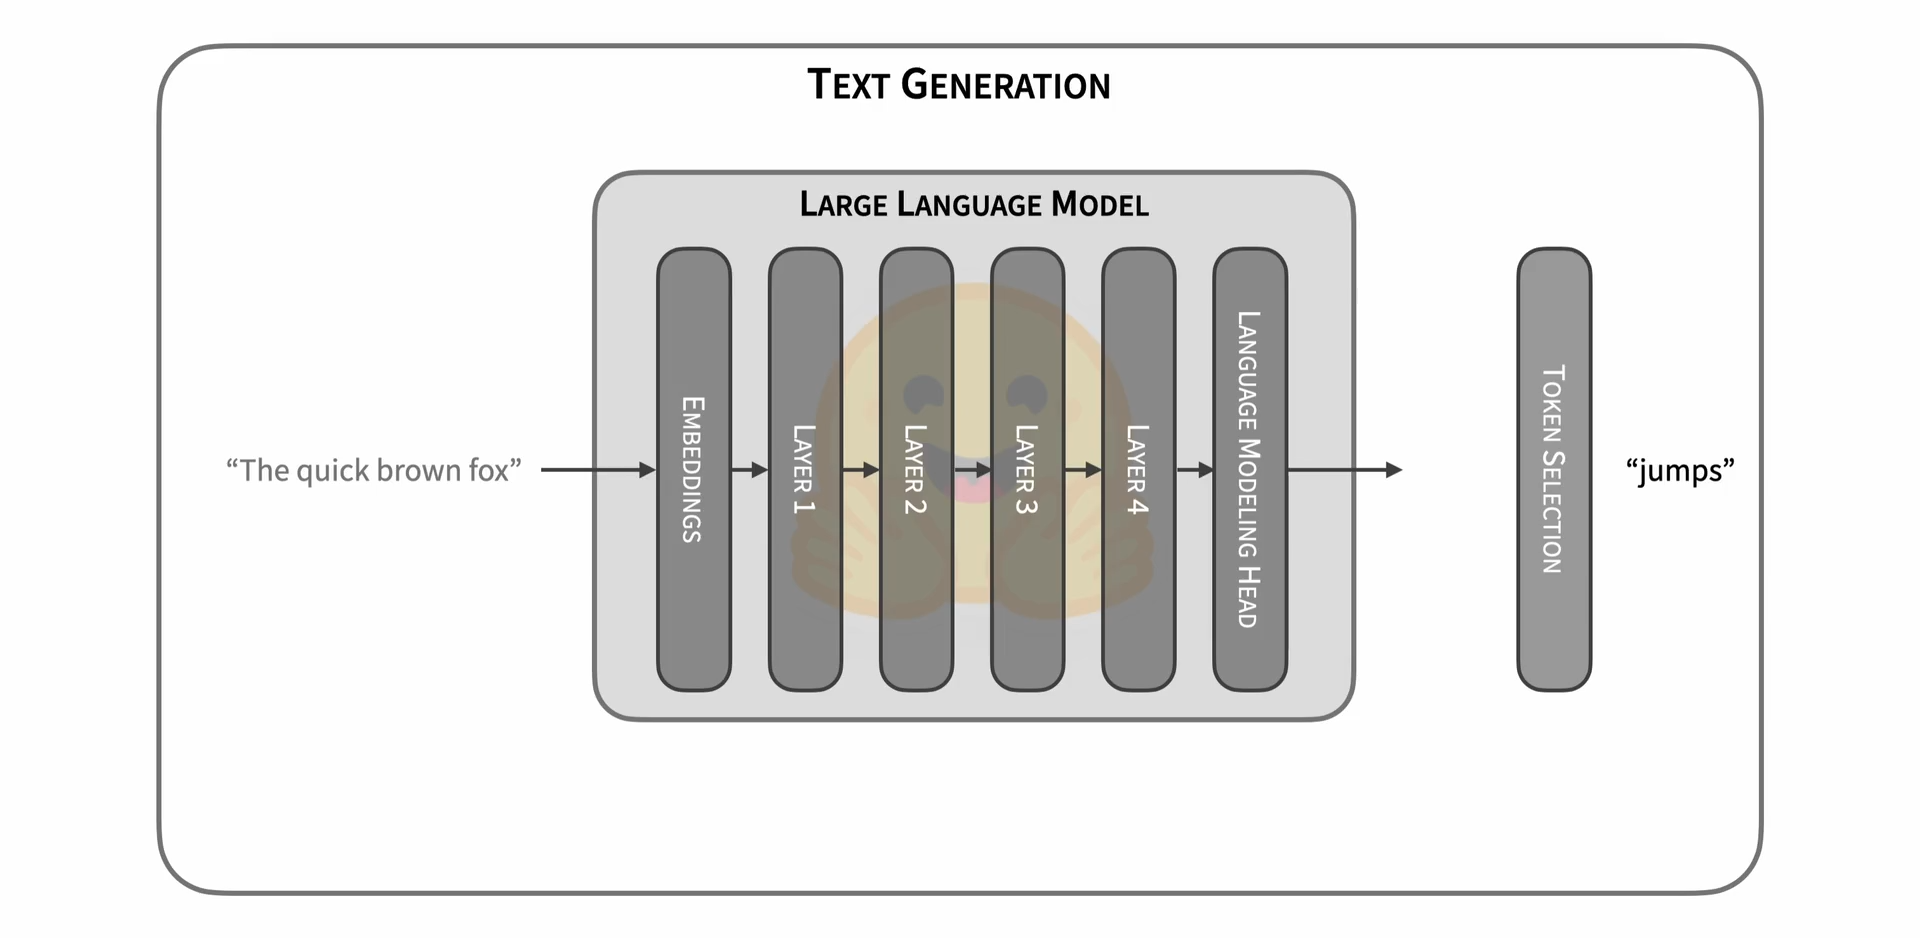
Image source : huggingface.co

### Exercise 3.A : Generate  text sequences. [10 points]

<font color='red'> Task list </font>
1. Currently [gpt2](https://huggingface.co/gpt2) is used for text generation, use [gpt2-xl](https://huggingface.co/gpt2-xl) model.
2. Get runtime for CPU for all combination of following variables <br>
  - Sequence length : 50 & 200 <br>
  -  Num return sequences : 1 & 4 <br>
3. Fill the value of runtime variables.

In [ ]:
from transformers import pipeline
device = 'cpu'
generator = pipeline('text-generation', model='gpt2', device = device)

start = time.time()
generator("Tell me some facts about Atlanta", max_length=200, num_return_sequences=1)
end = time.time()
text_generation_time = end-start
print(f'Text Generation time on {device} took {text_generation_time:0.3f} secs')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Text Generation time on cpu took 12.283 secs


In [ ]:
text_gen_num_seq_1_length_50_cpu  = 5.406
text_gen_num_seq_1_length_200_cpu = 12.283
text_gen_num_seq_4_length_50_cpu  = 7.140
text_gen_num_seq_4_length_200_cpu = 26.675 # secs

### Exercise 3.B : Calculate the runtime when using GPUs. [10 points]

<font color='red'> Task list </font>

1. Get runtime for GPU for all combination of following variables
  - Sequence length : 50 & 200
  - Num return sequences : 1 & 4
2. Fill the value of runtime variables.

In [ ]:
## Generate code using GPU
device = 'cuda'
generator = pipeline('text-generation', model='gpt2', device = device)

start = time.time()
generator("Tell me some facts about Atlanta", max_length=200, num_return_sequences=1)
end = time.time()
text_generation_time = end-start
print(f'Text Generation time on {device} took {text_generation_time:0.3f} secs')

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
text_gen_num_seq_1_length_50_gpu  = 1
text_gen_num_seq_1_length_200_gpu = 1
text_gen_num_seq_4_length_50_gpu  = 1
text_gen_num_seq_4_length_200_gpu = 1

### Exercise 3.C : Fill the table below.  [10 points]

<font color='red'> Double click the table below and fill in the values. </font>

Generation Time(seconds)


| Num Sequence | Max Length  | CPU | GPU |
|:------------:|:-----------:|:---:|:---:|
| 1 | 50  |         |            |
| 1 | 200 |         |            |
| 4 | 50  |         |            |
| 4 | 200 |         |            |

## Generate output csv.  [10 points]

Do not change anything here, only modify the values at  variable declaration.

In [ ]:
import csv
with open('HML_Lab0_outputs.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['CPU', training_time_cpu, final_loss_cpu])
    writer.writerow(['GPU', training_time_gpu, final_loss_gpu])
    writer.writerow(['CPU', inf_time_cpu, best_prob_cpu])
    writer.writerow(['GPU', inf_time_gpu, best_prob_gpu])
    writer.writerow(['1', '50', text_gen_num_seq_length_1_50_cpu  , text_gen_num_seq_1_length_50_gpu])
    writer.writerow(['1', '200', text_gen_num_seq_length_1_200_cpu , text_gen_num_seq_1_length_200_gpu])
    writer.writerow(['4', '50', text_gen_num_seq_4_length_50_cpu  , text_gen_num_seq_4_length_50_gpu])
    writer.writerow(['4', '200', text_gen_num_seq_4_length_200_cpu , text_gen_num_seq_4_length_200_gpu])


In [ ]:
from google.colab import files
files.download('HML_Lab0_outputs.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

** Students should submit the pdf and HML_Lab0_outputs.csv **

Steps for generating the PDF are listed below.

### **Guide for Exporting Ipython Notebook to PDF:**
Here is a [video](https://www.youtube.com/watch?v=yXzw9Dd_Na0) summarizes how to export Ipythin Notebook into PDF.<br>
 - **[Recommended Method: GoFullPage]**<br>
 Install the extension "[GoFullPage](https://chrome.google.com/webstore/detail/gofullpage-full-page-scre/fdpohaocaechififmbbbbbknoalclacl)" for Google Chrome. After you run every cell on Google Collab, use this tool to take a screenshot of all of the questions. Then download the screenshot as a PDF file. Remember that this extension might take a few minutes to create the PDF. To see the procedure, go over the example visuals of the extension "GoFullPage."<br>
 Note: Anyother method of generating the pdf is also welcome. But it would be student's responsibility to ensure figures or texts are readable. Try to tweak the layout by adding empty lines to avoid the code and outputs being splitted into multiple pages.